# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [21]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas 
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [46]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col= "year")

# Check for null values
number_of_nulls = sfo_data.isnull().sum().sum()
print(f"Number of null values: {number_of_nulls}")

# Drop the null values
sfo_data.dropna(inplace = True)

number_of_nulls = sfo_data.isnull().sum().sum()
print(f"After dropping null values: {number_of_nulls}")

sfo_data.head(3)

Number of null values: 5
After dropping null values: 0


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [24]:
# Calculate the mean number of housing units per year (hint: use groupby) 
average_housing_units_per_year = sfo_data["housing_units"].groupby(["year"]).mean()
average_housing_units_per_year_df = pd.DataFrame(average_housing_units_per_year)

average_housing_units_per_year_df.head()

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348


In [25]:
# Set the output file path
output_file_path = Path("Data/sfo_annual_housing_units.csv")

# Dataframe to the output path
average_housing_units_per_year_df.to_csv(output_file_path)

In [26]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
average_housing_units_per_year_df.hvplot.bar(xlabel = "Year", ylabel = "Average Housing Units", ylim = (370000, 385000), title = "Average Annual Housing Unit Occupation in San Francisco\n")

:Bars   [year]   (housing_units)

In [50]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# Calculate the necessary statistical parameters: min, max, std
min_of_annual_unit_averages = int(average_housing_units_per_year_df.min())
max_of_annual_unit_averages = int(average_housing_units_per_year_df.max())
std_of_annual_unit_averages = int(average_housing_units_per_year_df.std())

#Calculate the y-axis upper limit = heights_annual_unit_averages and the y-axis lower limit = min_height_annual_unit_averages and convert to integer format
max_height_annual_unit_averages = max_of_annual_unit_averages + std_of_annual_unit_averages
min_height_annual_unit_averages = min_of_annual_unit_averages - std_of_annual_unit_averages

# Print the statistical data
print(f"\nMinimum Value of the Annual Averages of Units: {min_of_annual_unit_averages}")
print(f"Maximum Value of the Annual Averages of Units: {max_of_annual_unit_averages}")
print(f"Standard Deviation of the Annual Averages of Units: {std_of_annual_unit_averages} \n")
print()

# Plot a bar graph with the calcualted y-axis range
average_housing_units_per_year_df.hvplot.bar(xlabel = "Year", ylabel = "Average Housing Units", ylim = (min_height_annual_unit_averages, max_height_annual_unit_averages), title = "Average Housing Units Occupation in San Francisco")


Minimum Value of the Annual Averages of Units: 372560
Maximum Value of the Annual Averages of Units: 384242
Standard Deviation of the Annual Averages of Units: 4206 




:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [28]:
# Calculate the average average gross rent
average_monthly_rent = sfo_data["gross_rent"].groupby(["year"]).mean()
average_monthly_rent_df = pd.DataFrame(average_monthly_rent)
average_monthly_rent_df.head(3)

,gross_rent
year,
2010,1239
2011,1530
2012,2324


In [29]:
# Calculate the average sale price per square foot

average_sales_price_per_square_foot = sfo_data["sale_price_sqr_foot"].groupby(["year"]).mean()
average_sales_price_per_square_foot_df = pd.DataFrame(average_sales_price_per_square_foot)
average_sales_price_per_square_foot_df.head(3)

,sale_price_sqr_foot
year,
2010,369.344353
2011,341.903429
2012,399.389968


In [51]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!

# Line chart for average montly rent
average_monthly_rent_df.hvplot.line(xlabel = "Year", line_color = "Green", line_width = 2.5, ylabel = "Average Monthly Rent", ylim = (800, 5000), title = "Annual Avariation of the Average Monthly Rent in San Francisco")

:Curve   [year]   (gross_rent)

In [52]:
average_sales_price_per_square_foot_df.hvplot.line(xlabel = "Year", line_color = "Red", line_width = 2.5, ylabel = "Average Sale Price per Sq Ft", ylim = (300,800), title = "Annual Variation of the Average Sale Price per Sq Ft in San Francisco")


:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [53]:
#sfo_data.reset_index(inplace = True)

sfo_data.head(3)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239


In [54]:
#group by year and hood then create a new dataframe of the mean sales price per sq foot
sfo_sale_price_sqr_ft_df = sfo_data.drop(columns = ["housing_units", "gross_rent"])
mean_sale_price_sqr_foot = sfo_sale_price_sqr_ft_df.groupby(["year", "neighborhood"]).mean()
mean_sale_price_sqr_foot_df = pd.DataFrame(mean_sale_price_sqr_foot)

#group by year and hood and create a new dataframe of the mean gross rent
sfo_gross_rent_df = sfo_data.drop(columns = ["sale_price_sqr_foot", "housing_units"])
mean_gross_rent = sfo_gross_rent_df.groupby(["year", "neighborhood"]).mean()
mean_gross_rent_df = pd.DataFrame(mean_gross_rent)


In [55]:
mean_sale_price_sqr_foot_df.hvplot.line(x = "year", y= "sale_price_sqr_foot", xlabel = "Year", ylabel = "Sales Price per Sq Foot", groupby = "neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [73]:
# Use hvplot to create an interactive line chart of the average 
# monthly rent.
# The plot should have a dropdown selector for the neighborhood


mean_gross_rent_df.hvplot.line(x = "year", y = "gross_rent", xlabel = "Year", ylabel = "Gross Rent", groupby = "neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [83]:
# Getting the data from the top 10 expensive neighborhoods to own
#mean_sale_price_sqr_foot_df.sort_values(by = ["sale_price_sqr_foot"], ascending = False, inplace=True)

mean_sale_price_sqr_foot_no_index_df = mean_sale_price_sqr_foot_df.reset_index()
mean_sale_price_sqr_foot_no_index_df.head()

,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623


In [84]:
mean_sale_price_sqr_foot_df = mean_sale_price_sqr_foot_no_index_df.set_index("neighborhood")


In [86]:

mean_sale_price_of_neighborhood = mean_sale_price_sqr_foot_df["sale_price_sqr_foot"].groupby("neighborhood").mean()
mean_sale_price_of_neighborhood_df = pd.DataFrame(mean_sale_price_of_neighborhood)
mean_sale_price_of_neighborhood_df.head()

,sale_price_sqr_foot
neighborhood,
Alamo Square,366.020712
Anza Vista,373.382198
Bayview,204.588623
Bayview Heights,590.792839
Bernal Heights,576.746488


In [87]:
# filter out 10 most expensive neighborhoods
top_10_mean_sale_price_sqr_foot_df = mean_sale_price_sqr_foot_df.nlargest(10, "sale_price_sqr_foot")

top_10_mean_sale_price_sqr_foot_df.hvplot.bar(height = 600 width = 600, x = "neighborhood", y = "sale_price_sqr_foot", color = "Orange", xlabel = "Neighborhood" , ylabel = "Price Per Sq Foot" , title = "Top Ten Most Expensive Neighborhoods by Sq Ft")

SyntaxError: invalid syntax (<ipython-input-87-2e51ba964ea0>, line 4)

In [ ]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [16]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood



In [15]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

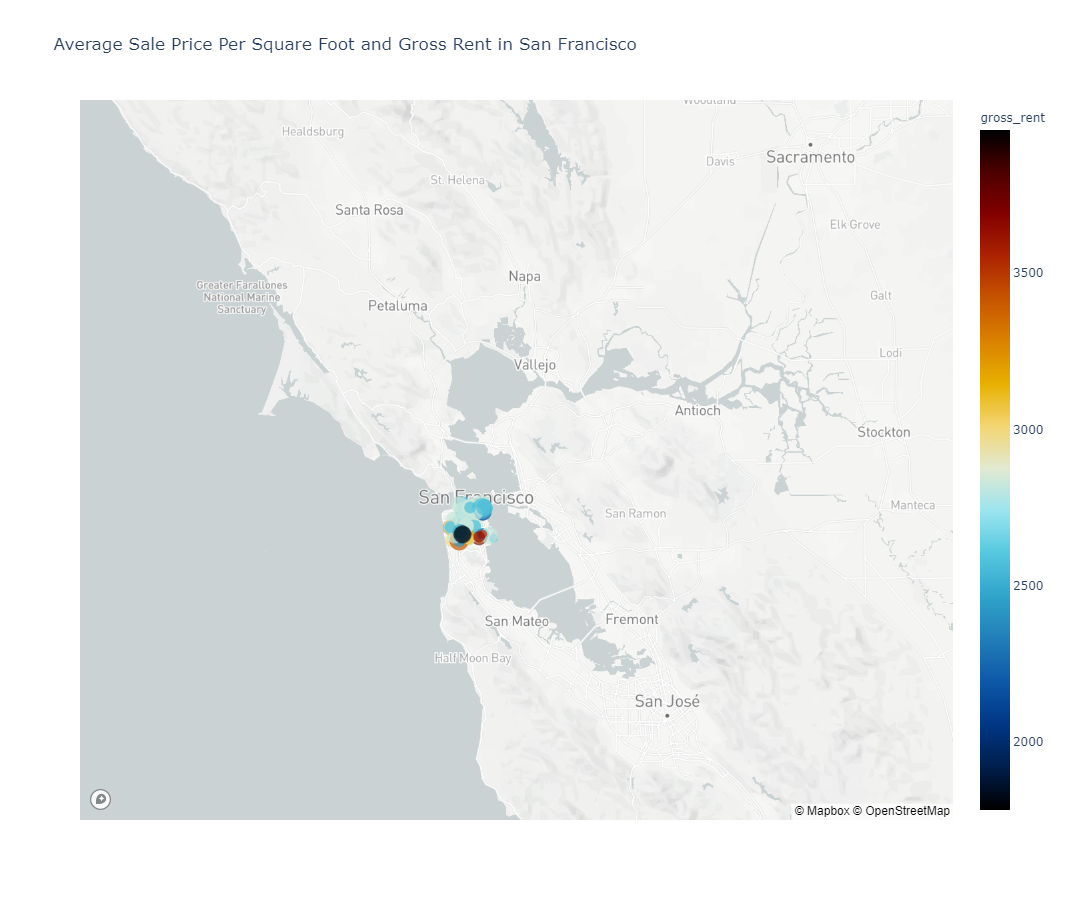

In [19]:
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


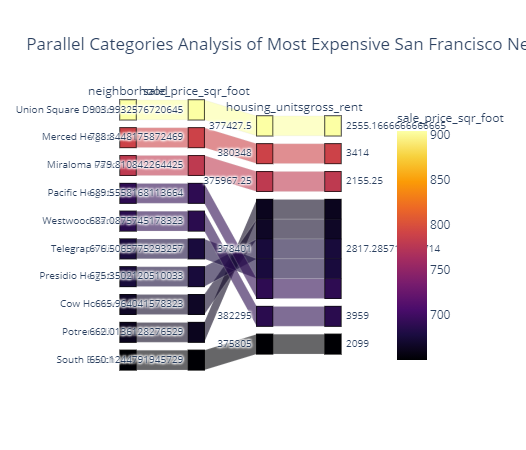

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

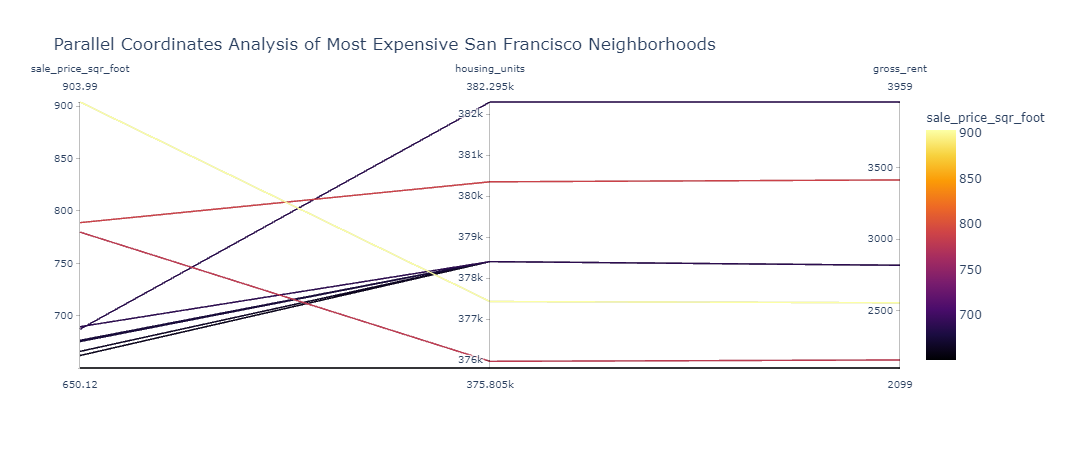

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

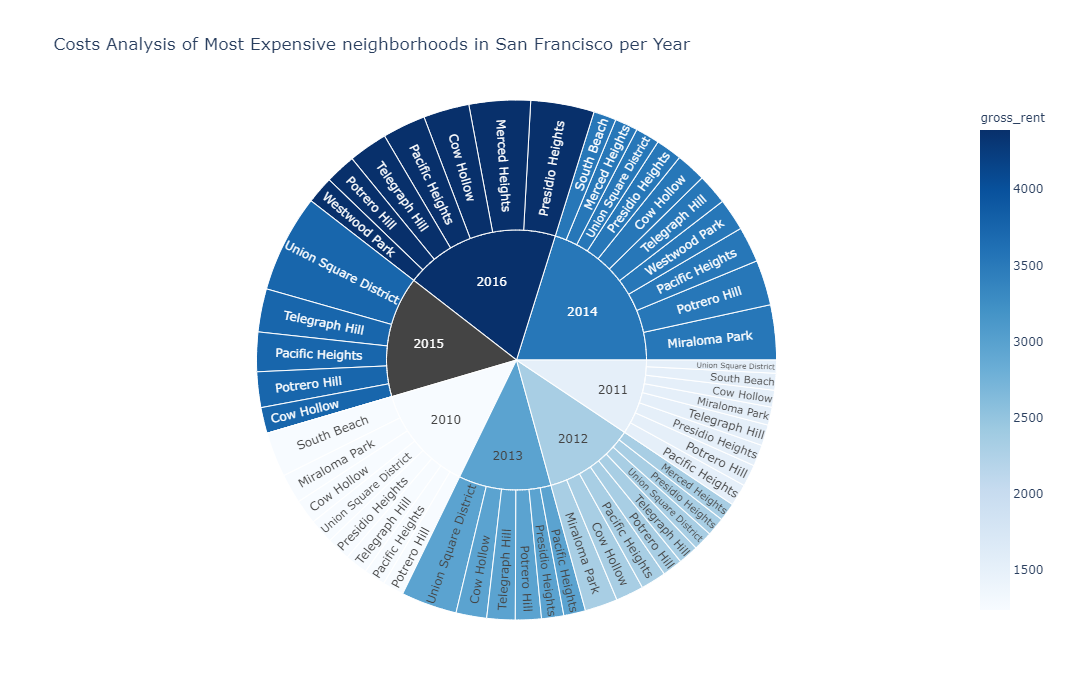

In [23]:
# Sunburst Plot
# YOUR CODE HERE!